# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import pylab as plt
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [2]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')

In [3]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [4]:
plt.rcParams['figure.figsize']=(12, 4)

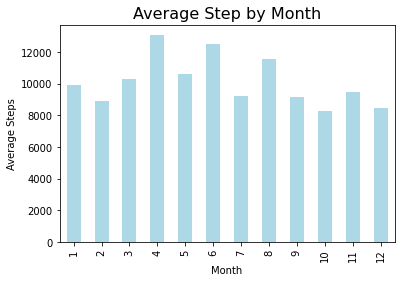

In [5]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
fitbit.groupby('Months_encoded')['Steps'].mean().plot(kind='bar', color = 'lightblue')
plt.title('Average Step by Month',fontsize=16)
plt.xlabel('Month',fontsize=10)
plt.ylabel('Average Steps',fontsize=10)
plt.tick_params(axis='both',labelsize=10)
plt.savefig('figures/Steps_months.jpg')

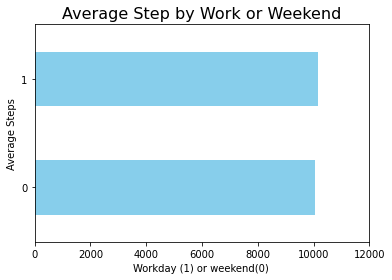

In [6]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
fitbit.groupby('Work_or_Weekend')['Steps'].mean().plot.barh(color='skyblue')
plt.title('Average Step by Work or Weekend',fontsize=16)
plt.xlabel('Workday (1) or weekend(0) ',fontsize=10)
plt.ylabel('Average Steps',fontsize=10)
plt.xlim(0, 12000) #To compare within months 
plt.savefig('figures/Steps_workday_weekend.jpg')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [7]:
fitbit.columns = [i.replace(' ', '_') for i in fitbit.columns]
fitbit.columns

Index(['Date', 'Calorie_burned', 'Steps', 'Distance', 'Floors',
       'Minutes_Sedentary', 'Minutes_Lightly_Active', 'Minutes_Fairly_Active',
       'Minutes_Very_Active', 'Activity_Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours_Sleep', 'Sleep_efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

In [8]:
loop = fitbit[["Minutes_Lightly_Active", "Minutes_Very_Active", "Minutes_Sedentary", "Steps"]]

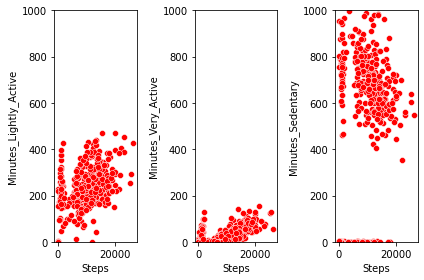

In [9]:
count=1
for i in loop.columns[0:3]:
    plt.subplot(1,3,count)
    sns.scatterplot(data=loop,x=loop["Steps"], y=loop[i], color= 'red')
    plt.ylim(0, 1000) #To compare them
    count+=1

plt.tight_layout()

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [10]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [11]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes('number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
# your code here
plt.rcParams['figure.figsize']=(12, 6)

In [16]:
print(plt.style.available) #Print available styles
plt.style = 'classic'

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [17]:
titanic.Age.astype(int) 


0       22
1       38
2       26
3       35
4       35
        ..
1304    29
1305    39
1306    38
1307    29
1308    25
Name: Age, Length: 1309, dtype: int32

In [18]:
#Change value type and round values
titanic.Age=titanic.Age.round()
titanic.Age=titanic.Age.astype(int) 

In [19]:
titanic.Age.unique()

array([22, 38, 26, 35, 24, 54,  2, 27, 14,  4, 58, 20, 39, 55, 32, 31, 28,
       34, 15,  8, 19, 23, 40, 50, 33, 66, 42, 21, 18,  3, 30,  7, 49, 29,
       65, 44,  5, 11, 45, 17, 16, 25,  1, 46, 59, 71, 37, 47, 70, 12,  9,
       36, 51, 56, 48, 61, 13, 52, 62, 41, 63, 43, 60, 10, 64, 53, 57, 80,
        6,  0, 74, 67, 76])

#### Use the right visulalization to show the distribution of column `Age`.

In [23]:
import plotly.express as px

In [30]:
age_counts = titanic.Age.value_counts()

In [34]:
# your code here
fig = px.bar(age_counts, title="Age of passengers")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.1, 
    showlegend = False
)

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

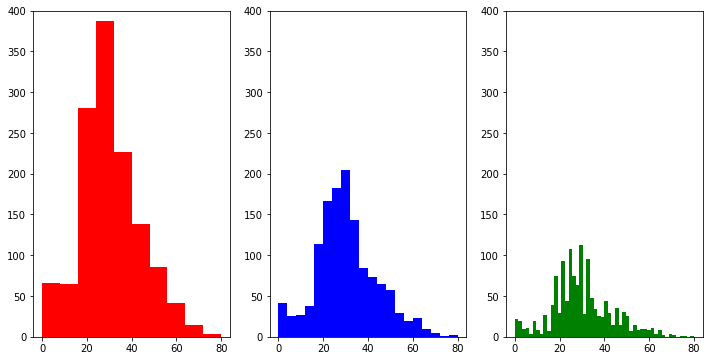

In [75]:
# your code here
plt.subplot(1, 3, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.hist(titanic.Age, bins=10, color='r')
plt.ylim(0, 400)
plt.subplot(1, 3, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.hist(titanic.Age, bins=20, color='b')
plt.ylim(0, 400)
plt.subplot(1, 3, 3)
plt.hist(titanic.Age, bins=50, color='g')
plt.ylim(0, 400)
plt.show()

#### How does the bin size affect your plot?

In [76]:
"""
The bin width affects the ability of a histogram to identify local regions of higher incidence. 
Too large, and you will not get enough differentiation. Too small, and the data cannot be grouped.
"""

'\nThe bin width affects the ability of a histogram to identify local regions of higher incidence. \nToo large, and you will not get enough differentiation. Too small, and the data cannot be grouped.\n'

#### Use seaborn to show the distribution of column `Age`.

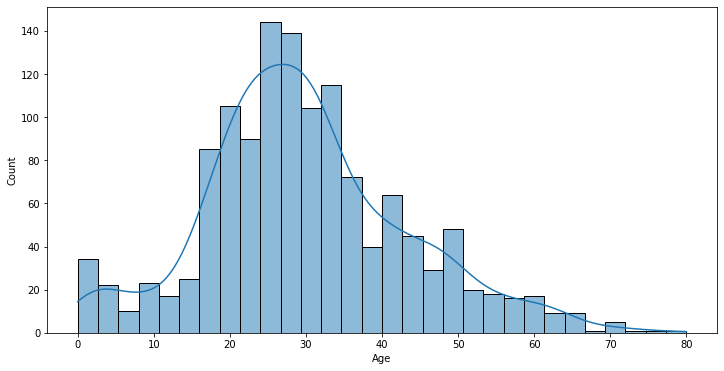

In [77]:
# your code here
sns.histplot(x=titanic.Age, bins=30,kde=True);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:ylabel='Age'>

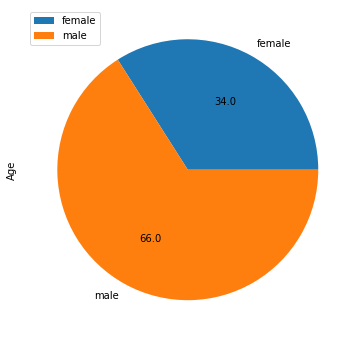

In [58]:
# Method 1 - matplotlib
# your code here
titanic.groupby('Gender').sum().plot(kind='pie', y='Age', autopct='%.1f')

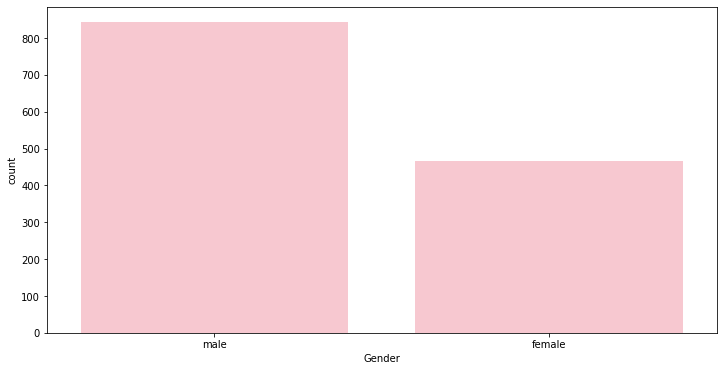

In [69]:
# Method 2 - seaborn
sns.countplot(x=titanic.Gender, color='pink');


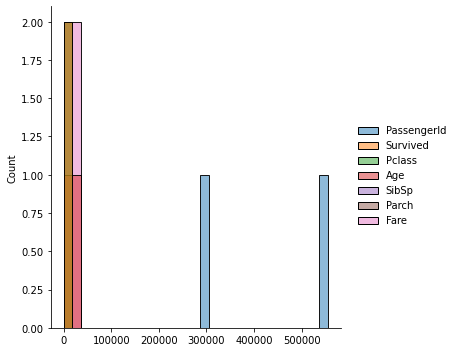

In [64]:
# Method 2 - seaborn
sns.displot(data=titanic.groupby('Gender').sum())

#### Use the right plot to visualize the column `Pclass`.

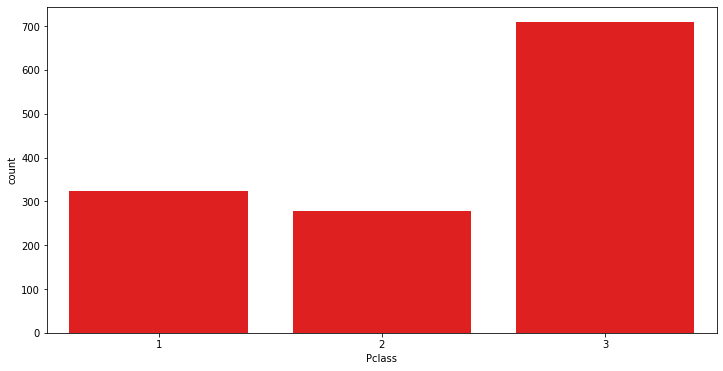

In [79]:
# your code here
titanic.Pclass.unique()
sns.countplot(x=titanic.Pclass, color='r');

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

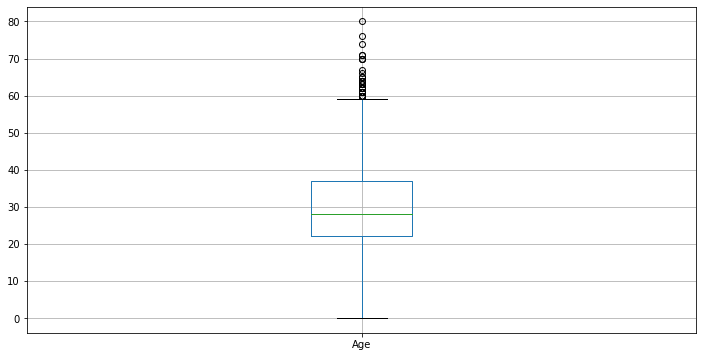

In [90]:
# your code here

titanic.boxplot(column='Age')

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

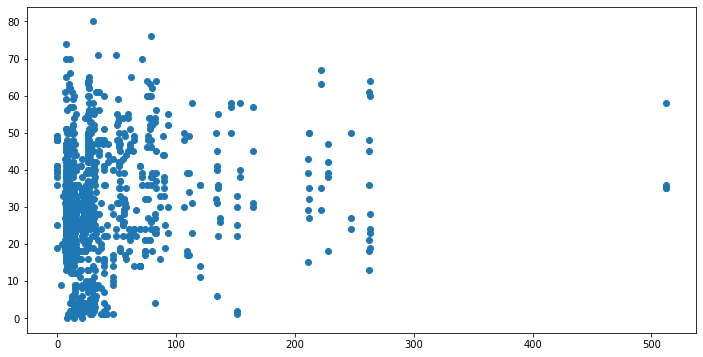

In [84]:
# Method 1 - matplotlib
# your code here
plt.scatter(x='Fare', y='Age', data=titanic);

<AxesSubplot:xlabel='Fare', ylabel='Age'>

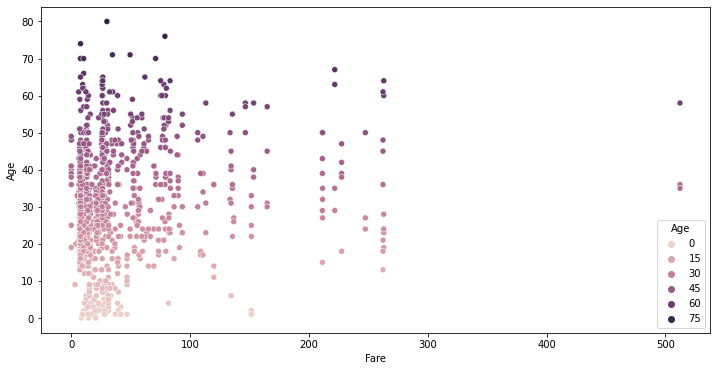

In [82]:
# Method 2 - seaborn
# your code here
sns.scatterplot(data=titanic, x="Fare", y="Age", hue="Age")

#### Plot the correlation matrix using seaborn.

In [86]:
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025209,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065957,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425069,0.060832,0.018322,-0.558683
Age,0.025209,-0.065957,-0.425069,1.000000,-0.259864,-0.145826,0.171046
SibSp,-0.055224,-0.035322,0.060832,-0.259864,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145826,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171046,0.160349,0.221635,1.000000


<AxesSubplot:>

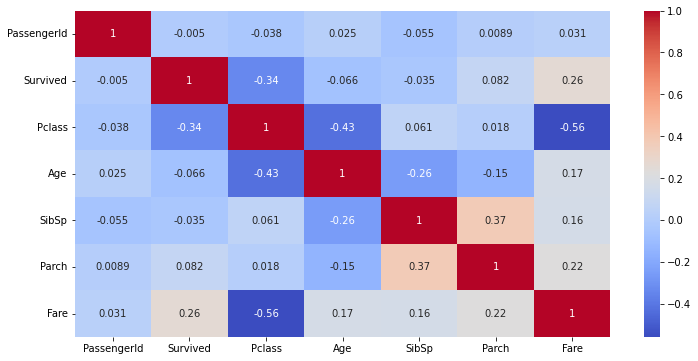

In [91]:
sns.heatmap(titanic.corr(), cmap='coolwarm', annot=True)

<AxesSubplot:>

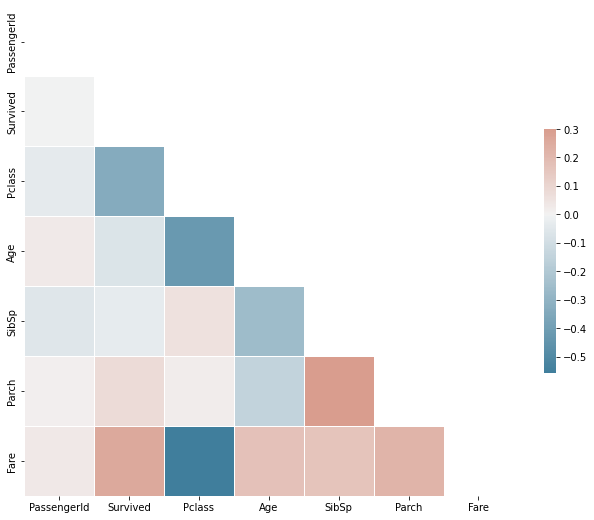

In [87]:
# your code here

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### What are the most correlated features?

In [ ]:
"""
Fare with Pclass, Age with Pclass and Pclass with Survived
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

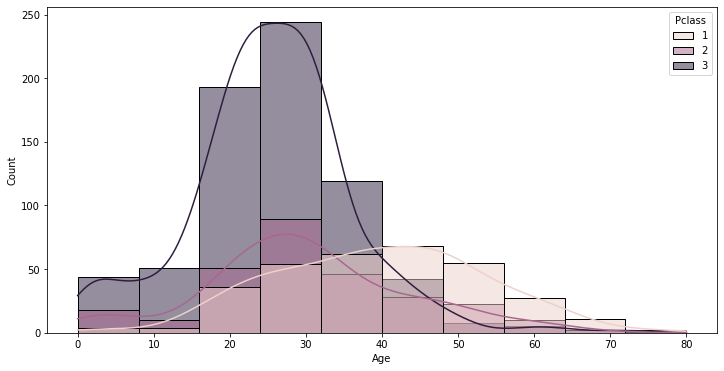

In [89]:
# your code here
sns.histplot(x=titanic.Age,hue=titanic.Pclass,bins=10,kde=True, color='navy');

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

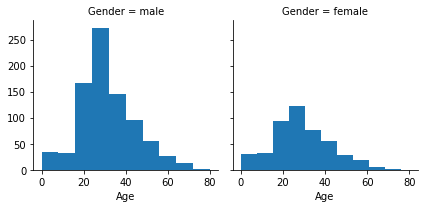

In [93]:
# your code here
age = sns.FacetGrid(data = titanic, col = 'Gender')
age.map(plt.hist, 'Age')